In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

path=r'D:/Study/Hackathon analytics vidhya/Hackathon AV hiring  10092020/'
train_df_new=pd.read_csv(os.path.join(path,'train.csv'))
test_df_new=pd.read_csv(os.path.join(path,'test.csv'))
#submission_df=pd.read_csv(os.path.join(path,'sample.csv'))
combine_set1 =pd.read_csv(os.path.join(path,'combine_set_train_test7.csv'))
#train_df_new = pd.read_csv('../input/av-janatahack-healthcare-hackathon-ii/Data/train.csv')
#test_df_new = pd.read_csv('../input/av-janatahack-healthcare-hackathon-ii/Data/test.csv')
from fastai.tabular import *


In [3]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [6]:
procs = [FillMissing, Categorify]
cat_names = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',
             'Manager_Joining_Designation','Manager_Current_Designation','Manager_Status','Manager_Gender']

cont_names = ['Applicant_City_PIN','Manager_Grade','Manager_Num_Application','Manager_Num_Coded','Manager_Business',
              'Manager_Num_Products','Manager_Business2','Manager_Num_Products2']
dep_var = 'Business_Sourced'

data = (TabularList.from_df(train_df_new, procs=procs, cont_names=cont_names, cat_names=cat_names)
        .split_by_idx(valid_idx=range(int(len(train_df_new)*0.99),len(train_df_new)))
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(test_df_new, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())
print(data.train_ds.cont_names)
print(data.train_ds.cat_names)

['Applicant_City_PIN', 'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business', 'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2']
['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender', 'Applicant_City_PIN_na', 'Manager_Grade_na', 'Manager_Num_Application_na', 'Manager_Num_Coded_na', 'Manager_Business_na', 'Manager_Num_Products_na', 'Manager_Business2_na', 'Manager_Num_Products2_na']


In [7]:
learn = tabular_learner(data, layers=[200,100,50], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


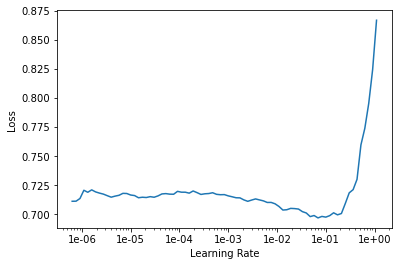

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:

learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,time
0,0.666609,0.642428,0.677083,00:56
1,0.640848,0.626524,0.656250,00:57
2,0.626544,0.616383,0.645833,00:56
3,0.621927,0.602639,0.656250,00:56
4,0.624071,0.611992,0.687500,00:56
5,0.612011,0.602275,0.677083,00:55
6,0.611504,0.598034,0.687500,00:55


In [10]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)

In [19]:
#preds.shape
pd.DataFrame(preds).to_csv("predictions.csv")
#output = pd.DataFrame(test_df_new['ID'].values,columns=['ID'])
#prediction = pd.read_csv('./predictions.csv',names=['Business_Sourced'],header=0)


In [ ]:
y_test_pred_xgb=model.predict(X_main_test)
finalpred=pd.concat([test_df['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("catbm1.csv",index=False)